# Logistic Regression(Classification) Project
# advertising Dataset

- Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

- Import and Inspect Data

In [4]:
df = pd.read_csv('advertisment.csv')

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.shape

(1000, 10)

In [7]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


- Check if Data need to clean

In [9]:
df.duplicated().sum()

0

<AxesSubplot: >

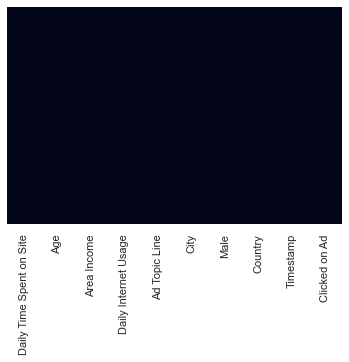

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [17]:
# Change Timestamp column to date type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

- Exploratory Data Analysis

In [23]:
df.drop({'Male','Clicked on Ad'},axis=1).describe().round(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.0,1000.0,1000.0,1000.0
mean,65.0,36.0,55000.0,180.0
std,15.9,8.8,13414.6,43.9
min,32.6,19.0,13996.5,104.8
25%,51.4,29.0,47031.8,138.8
50%,68.2,35.0,57012.3,183.1
75%,78.5,42.0,65470.6,218.8
max,91.4,61.0,79484.8,270.0


In [25]:
px.scatter(data_frame=df,x='Daily Time Spent on Site',y='Area Income',title='Time_spent Per Income')

In [27]:
px.scatter(data_frame=df,x='Daily Time Spent on Site',y='Daily Internet Usage',title='Time_spent Per Internet Usage')

<AxesSubplot: xlabel='Age'>

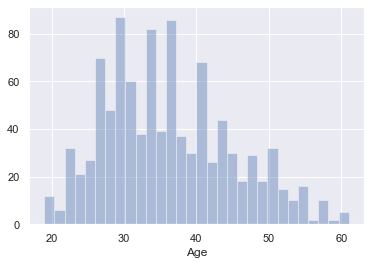

In [30]:
sns.distplot(df['Age'],bins=30,kde=False)

<AxesSubplot: xlabel='Area Income'>

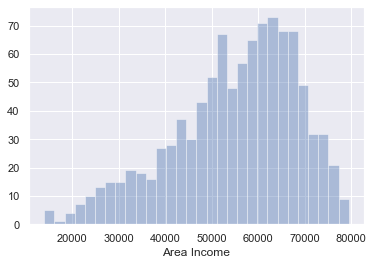

In [31]:
sns.distplot(df['Area Income'],bins=30,kde=False)

In [41]:
df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

<AxesSubplot: xlabel='Clicked on Ad', ylabel='Area Income'>

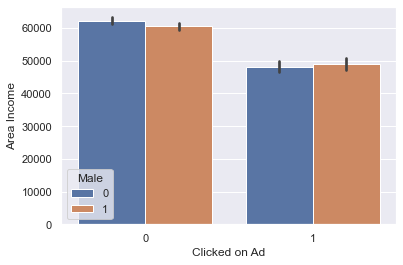

In [45]:
sns.barplot(data=df,x='Clicked on Ad',y='Area Income',hue='Male')

In [57]:
px.bar(df.pivot_table(index='City',values='Daily Internet Usage',aggfunc=np.sum).sort_values(by='Daily Internet Usage',ascending=False).head(5),title='top 5 cities By Daily Internet Usage')

SyntaxError: positional argument follows keyword argument (1924537996.py, line 1)

In [54]:
px.bar(df.pivot_table(index='Country',values='Daily Time Spent on Site',aggfunc=np.sum).sort_values(by='Daily Time Spent on Site',ascending=False).head(5),title='top 5 countries By Daily Time Spent on Site')

In [58]:
px.box(data_frame=df,x='Age')

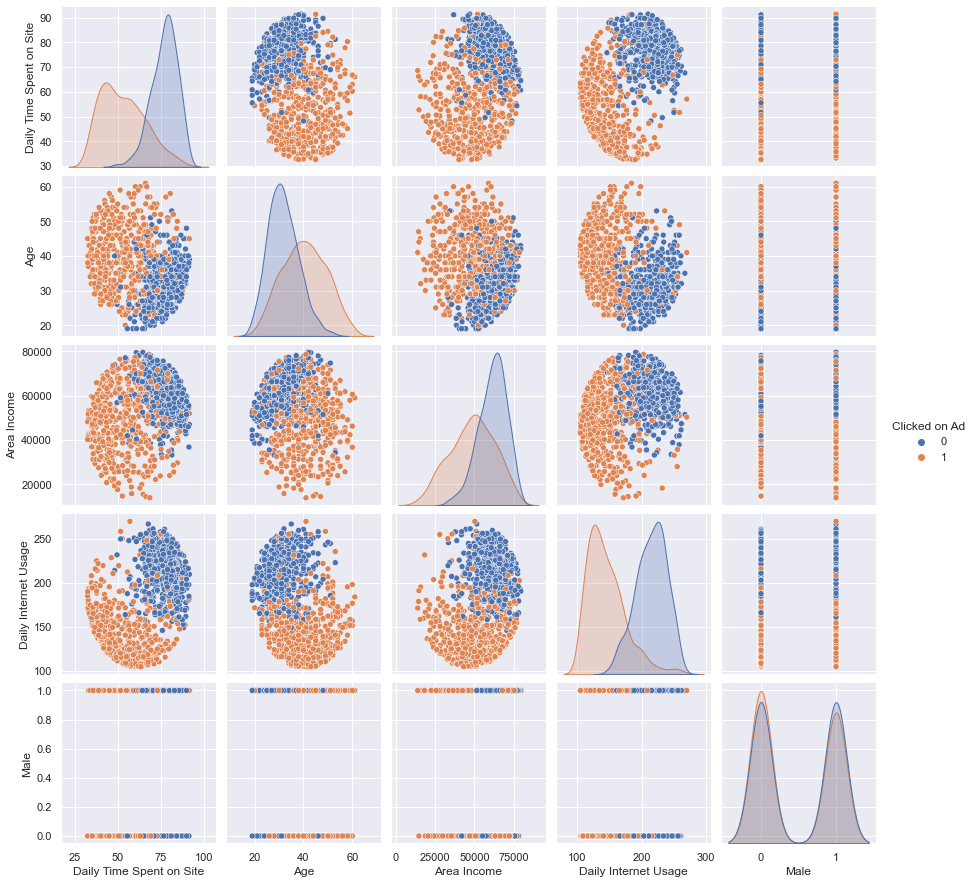

In [108]:
sns.pairplot(df,hue='Clicked on Ad')

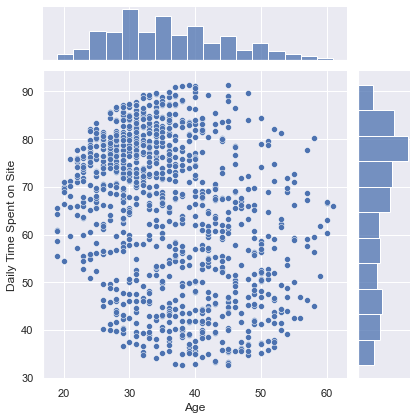

In [100]:
sns.jointplot(data=df,x='Age',y='Daily Time Spent on Site')

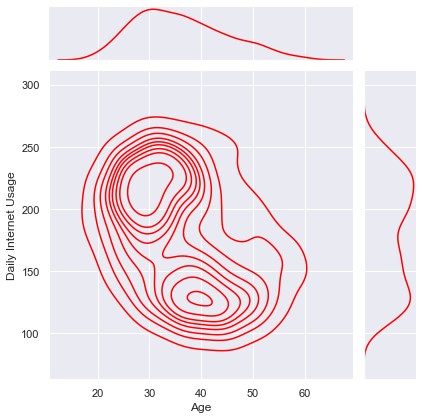

In [104]:
sns.jointplot(data=df,x='Age',y='Daily Internet Usage',kind='kde',color='red')

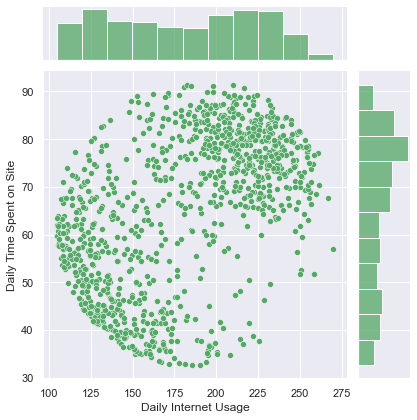

In [106]:
sns.jointplot(data=df,x='Daily Internet Usage',y='Daily Time Spent on Site',color='g')

In [62]:
px.histogram(data_frame=df,x='Daily Time Spent on Site',nbins=30)

In [63]:
px.histogram(data_frame=df,x='Daily Internet Usage',nbins=30)

<AxesSubplot: xlabel='Area Income'>

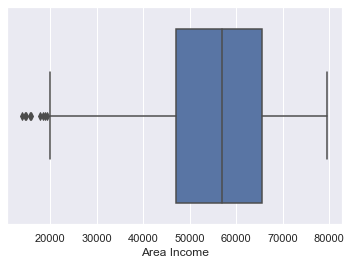

In [65]:
sns.boxplot(data=df,x='Area Income')

<AxesSubplot: xlabel='Timestamp', ylabel='Daily Time Spent on Site'>

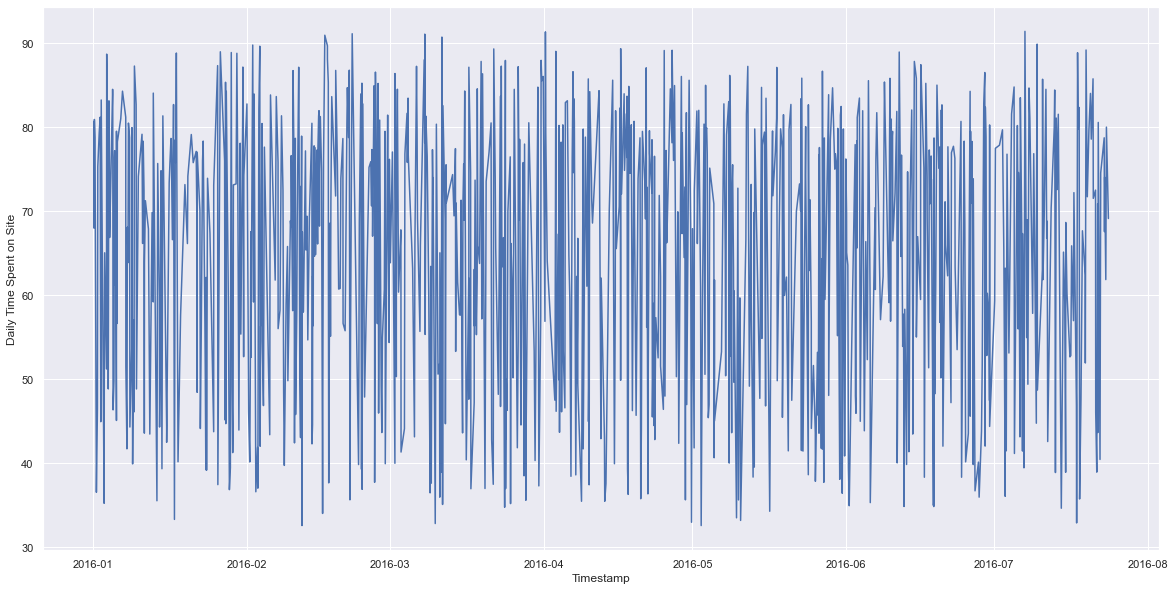

In [77]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Timestamp',y='Daily Time Spent on Site')

In [71]:
px.pie(data_frame=df,names='Male',values='Daily Time Spent on Site')

<AxesSubplot: xlabel='Timestamp', ylabel='Daily Internet Usage'>

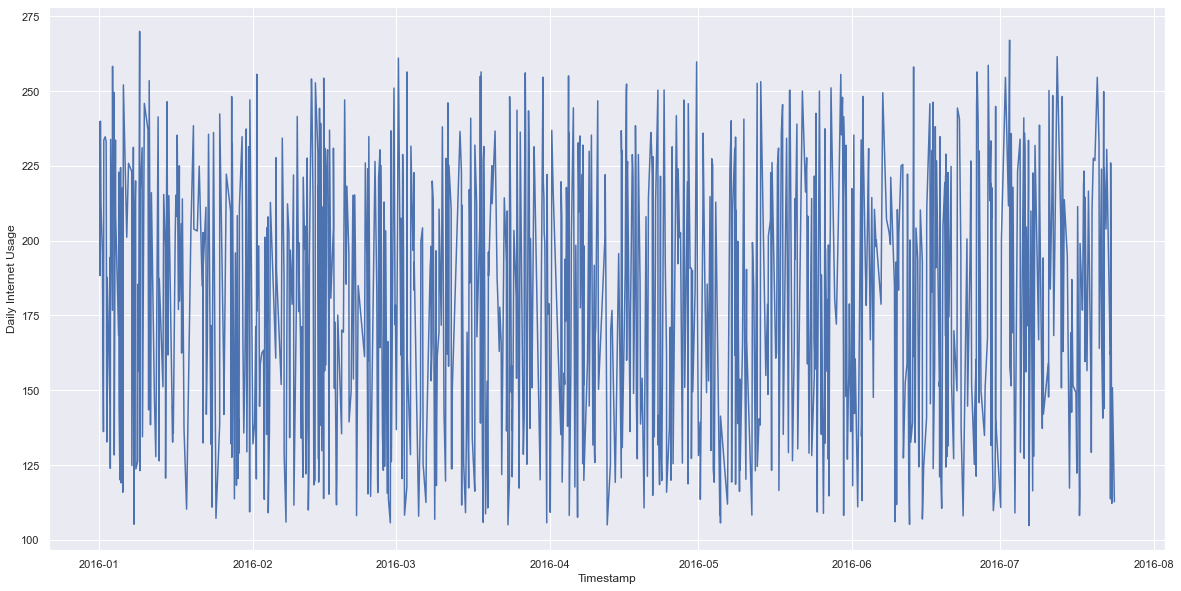

In [76]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Timestamp',y='Daily Internet Usage')

In [72]:
px.pie(data_frame=df,names='Male',values='Daily Internet Usage')

<AxesSubplot: xlabel='Timestamp', ylabel='Area Income'>

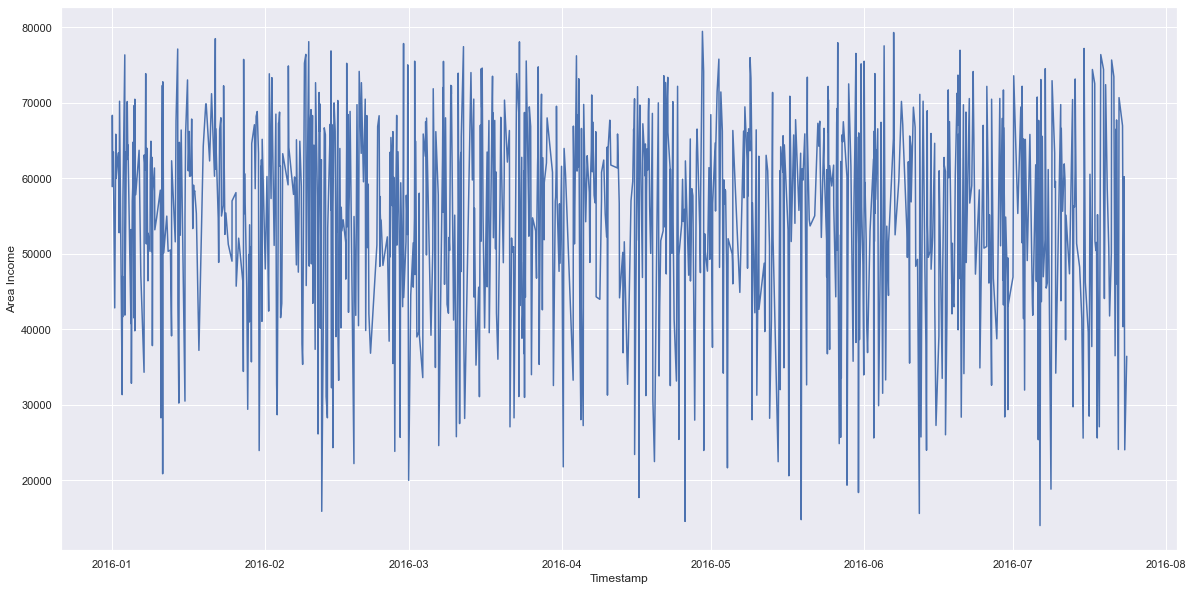

In [75]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Timestamp',y='Area Income')

<AxesSubplot: >

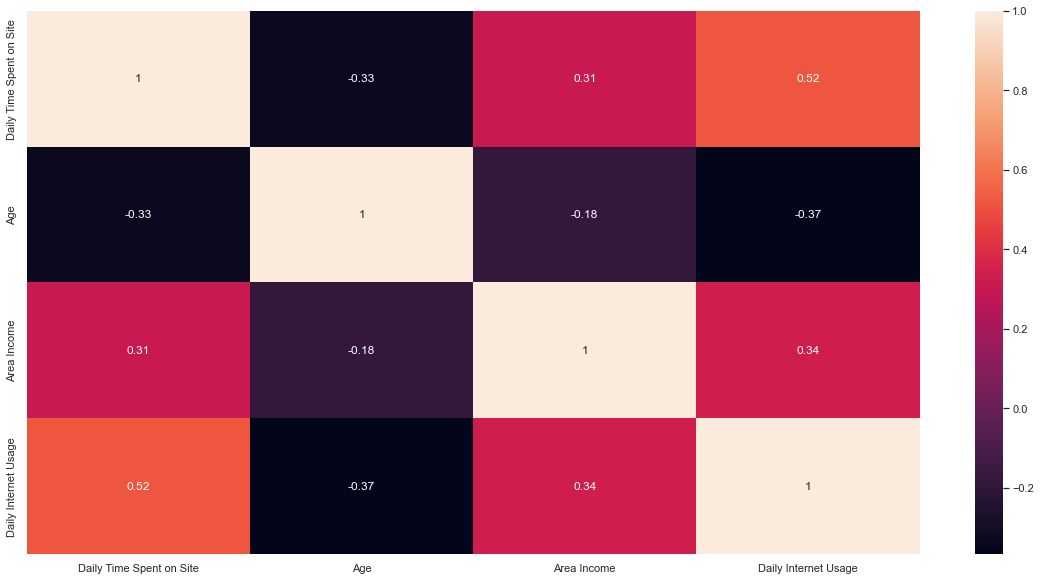

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop({'Male','Clicked on Ad'},axis=1).corr(),annot=True)

- Model Building

In [89]:
df.drop({'City','Country','Ad Topic Line'},axis=1,inplace=True)
df.drop('Timestamp',axis=1,inplace=True)

In [90]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [91]:
X = df.drop('Clicked on Ad',axis=1)
y = df['Clicked on Ad']

In [94]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [95]:
logmod = LogisticRegression()

In [96]:
logmod.fit(X_train, y_train)

LogisticRegression()

- Model Prediction and Evaluation

In [97]:
predictions = logmod.predict(X_test)

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       206
           1       0.92      0.88      0.90       194

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [99]:
print(confusion_matrix(y_test, predictions))

[[192  14]
 [ 23 171]]


- ----------------------------------------------